In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import os
def plot_figure(file_path, x_axis_col, y_axis_col,x_label,y_label, sub_plt,title):
    data = pd.read_csv(file_path)
    x_data = data[x_axis_col].to_numpy()
    y_data = data[y_axis_col].to_numpy()
    if(y_axis_col=="succs"):
        print(y_label+ " mean",np.mean(y_data))
    # data.plot(kind='line',x=x_axis_col,y=y_axis_col,ax=plt.gca())
    sub_plt.set_xlabel(x_label)
    sub_plt.set_ylabel(y_label)
    sub_plt.set_title(title)
    sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # sub_plt.set_xticks()
    # sub_plt.set_yticks(np.arange(0,100,10))
    sub_plt.plot(x_data,y_data)

In [2]:
def get_dir_session_files(dir_path):
    files = os.listdir(dir_path)
    inv_file = None
    timing_file = None
    selected_details_file = None
    for file in files:
        if file.startswith("invocation_"):
            inv_file = os.path.join(dir_path, file)
        if file.startswith("timing_"):
            timing_file = os.path.join(dir_path, file)
        if file.startswith("clients"):
            selected_details_file = os.path.join(dir_path, file)
    return inv_file, timing_file,selected_details_file

def get_variance(clients_log_path, plot):
    data = pd.read_csv(clients_log_path)
    grouped_data= data.groupby(['client_id']).size()
    print("num clients:", len(grouped_data))
    # print(grouped_data[0])
    plot.plot(grouped_data, np.arange(len(grouped_data)))
    return max(grouped_data),min(grouped_data)
        
def plot_dataset_compare_3(path_normals,path_enhanced,path_prox,titles):

    x_labels = [("round_id", "round number"),("round_id", "round number")]
    y_labels = [("succs", "EUR"),("global_test_accuracy","accuracy")]
    graph_titles = ["Effective Update Ratio", "Test Accuracy"]
    acc, acc_plts = plt.subplots(1, len(path_normals),figsize=(14,4))
    eur, eur_plts = plt.subplots(1,len(path_normals),figsize=(14,4))
    var, num_inv_plts = plt.subplots(1,len(path_normals),figsize=(14,4))
    
    if(len(path_normals)<=1):
        acc_plts = [acc_plts]
        eur_plts = [eur_plts]
        num_inv_plts = [num_inv_plts]
    acc.tight_layout(h_pad=6)
    eur.tight_layout(h_pad=6)
    for idx, (normal,enhanced,prox) in enumerate(zip(path_normals,path_enhanced,path_prox)):
        
        inv_path_normal,timing_path_normal,selected_normal = get_dir_session_files(normal)
        
        inv_path_enhanced,timing_path_enhanced, selected_enhanced  = get_dir_session_files(enhanced)
        inv_path_prox,timing_path_prox, selected_prox  = get_dir_session_files(prox)
        
        # selected_normal = pd.read_csv(selected_normal)
        # selected_enhanced = pd.read_csv(selected_enhanced)
        # selected_data_norm= selected_normal.groupby(['client_id']).size()
        # selected_data_e= selected_enhanced.groupby(['client_id']).size()
        max_norm, min_norm = get_variance(selected_normal,num_inv_plts[idx])
        max_en, min_en = get_variance(selected_enhanced,num_inv_plts[idx])
        max_prox, min_prox = get_variance(selected_prox,num_inv_plts[idx])
        print(f'norm variance: {max_norm-min_norm} for max of {max_norm} and min of {min_norm}')
        print(f'enhanced variance: {max_en-min_en} for max of {max_en} and min of {min_en}')
        print(f'prox variance: {max_prox-min_prox} for max of {max_prox} and min of {min_prox}')
        plot_figure(inv_path_normal,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[idx]+" "+graph_titles[0])
        plot_figure(timing_path_normal,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[idx]+" "+graph_titles[1])
        
        plot_figure(inv_path_enhanced,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[idx]+" "+graph_titles[0])
        plot_figure(timing_path_enhanced,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[idx]+" "+graph_titles[1])
        
        plot_figure(inv_path_prox,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[idx]+" "+graph_titles[0])
        plot_figure(timing_path_prox,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[idx]+" "+graph_titles[1])
        

### Speech dataset analysis


num clients: 542
num clients: 542
num clients: 542
norm variance: 17 for max of 22 and min of 5
enhanced variance: 13 for max of 14 and min of 1
prox variance: 17 for max of 22 and min of 5
EUR mean 199.17142857142858
EUR mean 199.97142857142856
EUR mean 198.4
num clients: 542
num clients: 542
num clients: 542
norm variance: 21 for max of 33 and min of 12
enhanced variance: 36 for max of 41 and min of 5
prox variance: 20 for max of 32 and min of 12
EUR mean 180.01666666666668
EUR mean 194.73333333333332
EUR mean 179.41666666666666
num clients: 542
num clients: 542
num clients: 542
norm variance: 23 for max of 34 and min of 11
enhanced variance: 27 for max of 33 and min of 6
prox variance: 21 for max of 34 and min of 13
EUR mean 139.8
EUR mean 183.65
EUR mean 139.36666666666667
num clients: 542
num clients: 542
num clients: 542
norm variance: 20 for max of 31 and min of 11
enhanced variance: 38 for max of 44 and min of 6
prox variance: 19 for max of 31 and min of 12
EUR mean 99.23333333

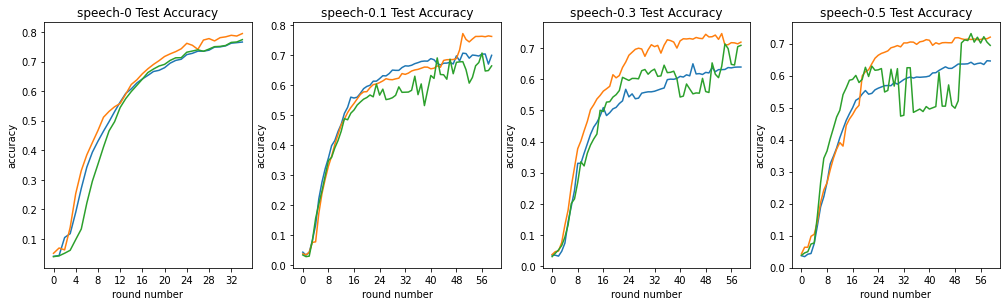

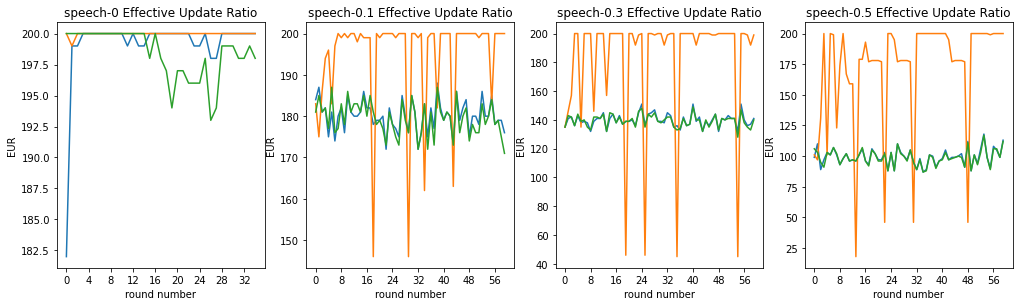

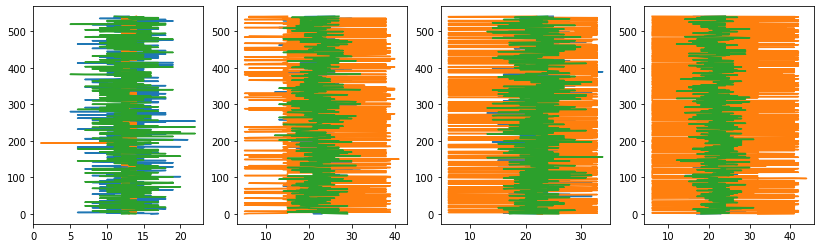

In [10]:
base_path = "../../out/real_world/speech_dataset"
dataset_titles = ["speech-0","speech-0.1","speech-0.3","speech-0.5"]

path_normals = [f'{base_path}/speech-0',f'{base_path}/speech-0.1',f'{base_path}/speech-0.3',f'{base_path}/speech-0.5']
path_prox = [f'{base_path}/speech-prox-0',f'{base_path}/speech-prox-0.1',f'{base_path}/speech-prox-0.3',f'{base_path}/speech-prox-0.5']

path_enhanced = [f'{base_path}/speech-enhanced-0',f'{base_path}/speech-enhanced-0.1',f'{base_path}/speech-enhanced-0.3',f'{base_path}/speech-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Mnist dataset analysis

num clients: 297
num clients: 297
num clients: 297
norm variance: 19 for max of 49 and min of 30
enhanced variance: 1 for max of 41 and min of 40
prox variance: 19 for max of 48 and min of 29
EUR mean 198.0
EUR mean 199.8
EUR mean 195.01666666666668
num clients: 300
num clients: 300
num clients: 300
norm variance: 25 for max of 53 and min of 28
enhanced variance: 40 for max of 44 and min of 4
prox variance: 21 for max of 50 and min of 29
EUR mean 179.61666666666667
EUR mean 196.76666666666668
EUR mean 176.18333333333334
num clients: 300
num clients: 300
num clients: 300
norm variance: 20 for max of 49 and min of 29
enhanced variance: 52 for max of 56 and min of 4
prox variance: 21 for max of 50 and min of 29
EUR mean 139.6
EUR mean 193.18333333333334
EUR mean 137.16666666666666
num clients: 300
num clients: 300
num clients: 300
norm variance: 20 for max of 48 and min of 28
enhanced variance: 48 for max of 60 and min of 12
prox variance: 20 for max of 49 and min of 29
EUR mean 99.8
EUR 

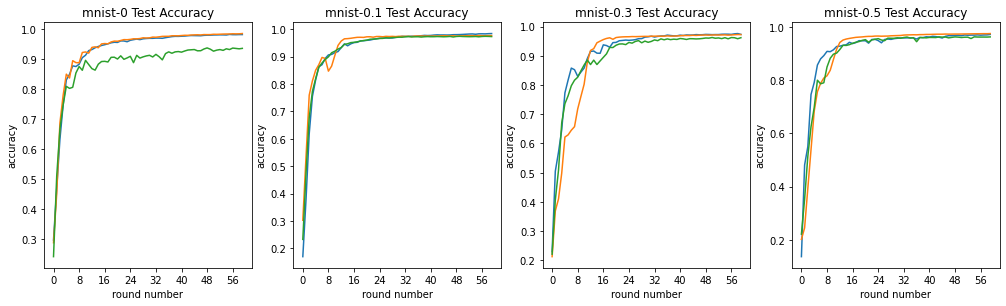

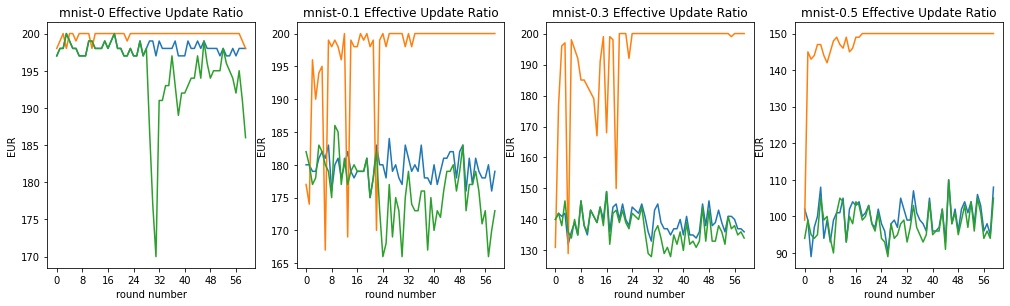

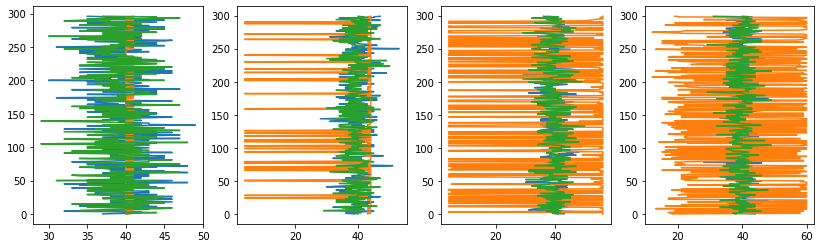

In [11]:
base_path = "../../out/real_world/mnist_dataset"
dataset_titles = ["mnist-0","mnist-0.1","mnist-0.3","mnist-0.5"]

path_normals = [f'{base_path}/mnist-0',f'{base_path}/mnist-0.1',f'{base_path}/femnist-0.3',f'{base_path}/mnist-0.5']
path_prox = [f'{base_path}/mnist-prox-0',f'{base_path}/mnist-prox-0.1',f'{base_path}/mnist-prox-0.3',f'{base_path}/mnist-prox-0.5']

path_enhanced = [f'{base_path}/mnist-enhanced-0',f'{base_path}/mnist-enhanced-0.1',f'{base_path}/mnist-enhanced-0.3',f'{base_path}/mnist-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Femnist dataset analysis

num clients: 300
num clients: 300
num clients: 300
norm variance: 22 for max of 32 and min of 10
enhanced variance: 13 for max of 24 and min of 11
prox variance: 21 for max of 31 and min of 10
EUR mean 174.225
EUR mean 174.3
EUR mean 168.4
num clients: 300
num clients: 300
num clients: 300
norm variance: 18 for max of 38 and min of 20
enhanced variance: 21 for max of 26 and min of 5
prox variance: 20 for max of 32 and min of 12
EUR mean 157.04
EUR mean 171.05
EUR mean 140.7
num clients: 300
num clients: 300
num clients: 300
norm variance: 19 for max of 33 and min of 14
enhanced variance: 27 for max of 32 and min of 5
prox variance: 21 for max of 31 and min of 10
EUR mean 120.65
EUR mean 162.8
EUR mean 112.025
num clients: 300
num clients: 300
num clients: 300
norm variance: 19 for max of 34 and min of 15
enhanced variance: 35 for max of 40 and min of 5
prox variance: 20 for max of 32 and min of 12
EUR mean 87.05
EUR mean 139.95
EUR mean 81.375


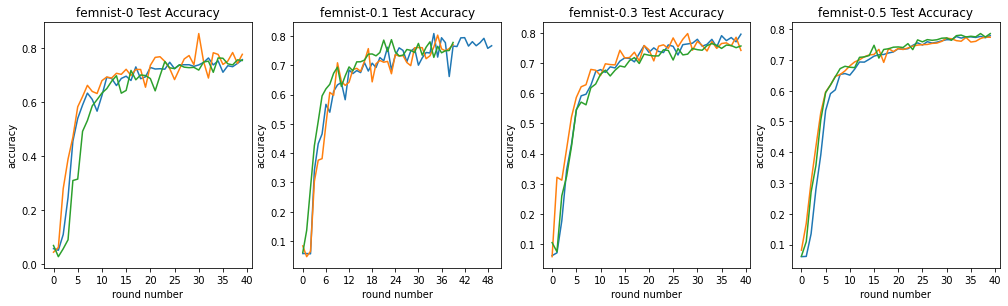

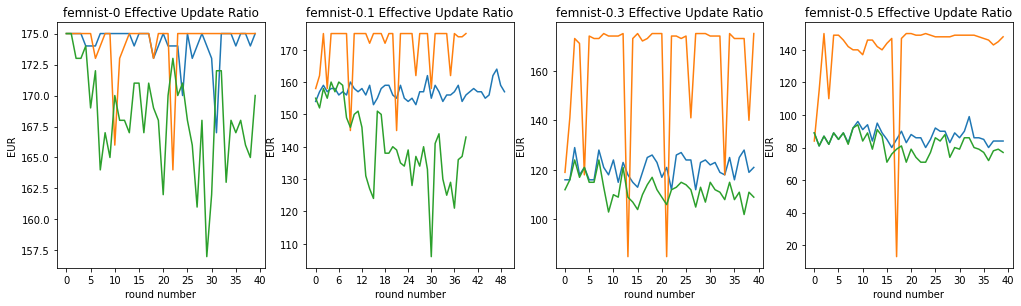

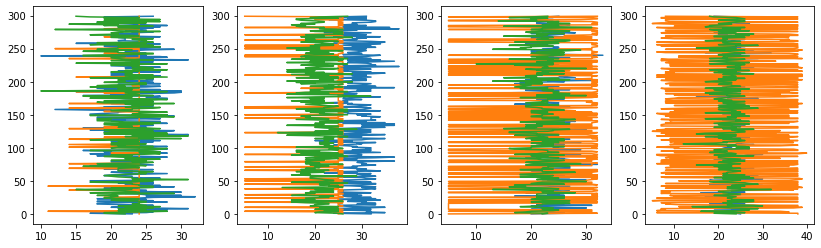

In [3]:
base_path = "../../out/real_world/femnist_dataset"
dataset_titles = ["femnist-0","femnist-0.1","femnist-0.3","femnist-0.5"]

path_normals = [f'{base_path}/femnist-0',f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.3',f'{base_path}/femnist-0.5--1']
path_prox = [f'{base_path}/femnist-prox-0',f'{base_path}/femnist-prox-0.1',f'{base_path}/femnist-prox-0.3',f'{base_path}/femnist-prox-0.5-0--1']

path_enhanced = [f'{base_path}/femnist-enhanced-0',f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.3',f'{base_path}/femnist-enhanced-0.5-expo-1']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)

### Sheakspeare dataset

num clients: 90
num clients: 91
num clients: 91
norm variance: 12 for max of 18 and min of 6
enhanced variance: 15 for max of 16 and min of 1
prox variance: 14 for max of 18 and min of 4
EUR mean 43.92
EUR mean 46.92
EUR mean 43.24
num clients: 93
num clients: 93
num clients: 92
norm variance: 16 for max of 17 and min of 1
enhanced variance: 17 for max of 18 and min of 1
prox variance: 11 for max of 17 and min of 6
EUR mean 39.8
EUR mean 45.36
EUR mean 38.96
num clients: 92
num clients: 92
num clients: 92
norm variance: 10 for max of 17 and min of 7
enhanced variance: 16 for max of 20 and min of 4
prox variance: 11 for max of 17 and min of 6
EUR mean 29.76
EUR mean 41.76
EUR mean 29.0
num clients: 94
num clients: 94
num clients: 94
norm variance: 12 for max of 19 and min of 7
enhanced variance: 19 for max of 24 and min of 5
prox variance: 11 for max of 18 and min of 7
EUR mean 20.88
EUR mean 36.64
EUR mean 20.48


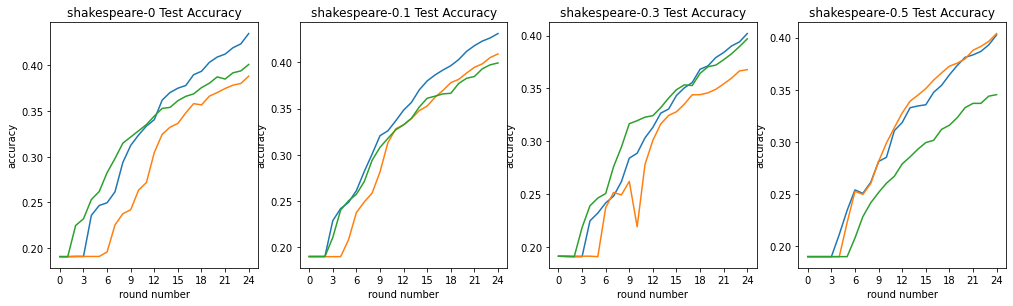

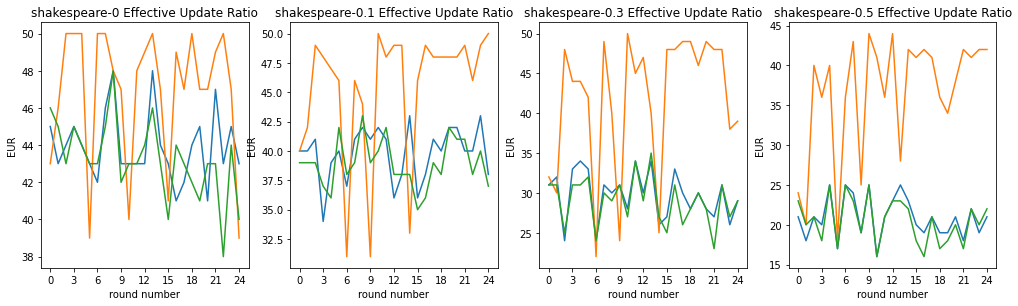

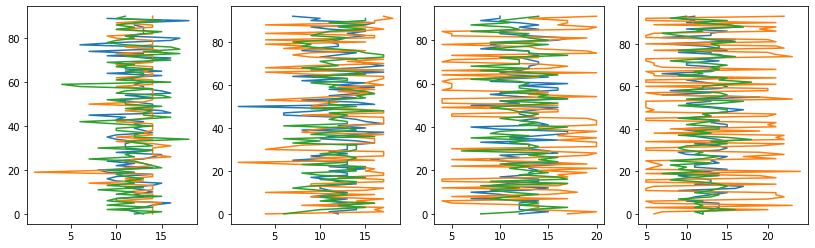

In [4]:
base_path = "../../out/real_world/shakespeare_dataset"
dataset_titles = ["shakespeare-0","shakespeare-0.1","shakespeare-0.3","shakespeare-0.5"]

path_normals = [f'{base_path}/shakespeare-0',f'{base_path}/shakespeare-0.1',f'{base_path}/shakespeare-0.3',f'{base_path}/shakespeare-0.5']
path_prox = [f'{base_path}/shakespeare-prox-0',f'{base_path}/shakespeare-prox-0.1',f'{base_path}/shakespeare-prox-0.3',f'{base_path}/shakespeare-prox-0.5']

path_enhanced = [f'{base_path}/shakespeare-enhanced-0',f'{base_path}/shakespeare-enhanced-0.1',f'{base_path}/shakespeare-enhanced-0.3',f'{base_path}/shakespeare-enhanced-0.5']


plot_dataset_compare_3(path_normals,path_enhanced,path_prox,dataset_titles)